# Part I - NFL Big Data Bowl 2022
## by David Krejcarek

## Introduction

Before National Football League (NFL) coaches celebrate a big W, they strategize ways to improve field position and score points. Both of these objectives receive significant contributions from special teams plays, which consist of punts, kickoffs, field goals and extra points. These play types take on important roles in a game’s final score—so much so that coaches say they're a third of the game. Yet special teams remain an understudied part of American football, with an opportunity for data science to offer better ways to understand its impact.

The 2022 Big Data Bowl creates the opportunity for you (and the world!) to learn more about special teams play than ever before. We've provided the NFL's Next Gen Stats (NGS) tracking data from all 2018-2020 special teams plays. This data provides location information for each special teams player, wherever they are on the field, and includes their speed, acceleration, and direction. Additionally, and for the first time in Big Data Bowl history, participants can utilize scouting data from PFF, which supplements the tracking data with football specific metrics that coaches find critical to team success.

The NFL is America's most popular sports league. Founded in 1920, the organization behind American football has developed the model for the successful modern sports league. They're committed to advancing every aspect of the game, including the lesser researched special teams. In this competition, you’ll quantify what happens on special teams plays. You might create a new special teams metric, quantify team or individual strategies, rank players, or even something we haven’t considered.

With your creativity and analytical skills, the development of these new methods could lead to additional stats for special teams plays. If successful, your effort may even be adopted by the NFL for on air distribution, and you can watch future games knowing you had a hand in improving America's most popular sports league.

Summary of data
The 2022 Big Data Bowl data contains Next Gen Stats player tracking, play, game, player, and PFF scouting data for all 2018-2020 Special Teams plays. Here, you'll find a summary of each data set in the 2022 Data Bowl, a list of key variables to join on, and a description of each variable.

## Preliminary Wrangling


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
# Load three data bases
games = pd.read_csv(os.path.join('data', 'games.csv'))
players = pd.read_csv(os.path.join('data', 'players.csv'))
plays = pd.read_csv(os.path.join('data', 'plays.csv'))
pff = pd.read_csv(os.path.join('data', 'PFFScoutingData.csv'))

In [3]:

games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 764 entries, 0 to 763
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gameId           764 non-null    int64 
 1   season           764 non-null    int64 
 2   week             764 non-null    int64 
 3   gameDate         764 non-null    object
 4   gameTimeEastern  764 non-null    object
 5   homeTeamAbbr     764 non-null    object
 6   visitorTeamAbbr  764 non-null    object
dtypes: int64(3), object(4)
memory usage: 41.9+ KB


In [4]:
# review the info of the Players
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2732 entries, 0 to 2731
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   nflId        2732 non-null   int64 
 1   height       2732 non-null   object
 2   weight       2732 non-null   int64 
 3   birthDate    2715 non-null   object
 4   collegeName  2724 non-null   object
 5   Position     2732 non-null   object
 6   displayName  2732 non-null   object
dtypes: int64(2), object(5)
memory usage: 149.5+ KB


In [5]:
# review the info of play database

plays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  19979 non-null  int64  
 1   playId                  19979 non-null  int64  
 2   playDescription         19979 non-null  object 
 3   quarter                 19979 non-null  int64  
 4   down                    19979 non-null  int64  
 5   yardsToGo               19979 non-null  int64  
 6   possessionTeam          19979 non-null  object 
 7   specialTeamsPlayType    19979 non-null  object 
 8   specialTeamsResult      19979 non-null  object 
 9   kickerId                19878 non-null  float64
 10  returnerId              6938 non-null   object 
 11  kickBlockerId           100 non-null    float64
 12  yardlineSide            19813 non-null  object 
 13  yardlineNumber          19979 non-null  int64  
 14  gameClock               19979 non-null

In [6]:
# review the info of Games

pff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19979 entries, 0 to 19978
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   19979 non-null  int64  
 1   playId                   19979 non-null  int64  
 2   snapDetail               5919 non-null   object 
 3   snapTime                 5918 non-null   float64
 4   operationTime            5918 non-null   float64
 5   hangTime                 13098 non-null  float64
 6   kickType                 13723 non-null  object 
 7   kickDirectionIntended    13701 non-null  object 
 8   kickDirectionActual      13701 non-null  object 
 9   returnDirectionIntended  4754 non-null   object 
 10  returnDirectionActual    4756 non-null   object 
 11  missedTackler            1348 non-null   object 
 12  assistTackler            1034 non-null   object 
 13  tackler                  4759 non-null   object 
 14  kickoffReturnFormation

In [7]:
print(games.shape)
print(players.shape)
print(plays.shape)
print(pff.shape)

(764, 7)
(2732, 7)
(19979, 25)
(19979, 20)


In [8]:
# Some standard variables
BASE_COLOR = sb.color_palette()[0]

### What is the structure of your dataset?

> There are three seperate tables:
    Game data: The games.csv contains the teams playing in each game. The key variable is gameId.  This contains 764 rows with 7 columns

> Play data: The plays.csv file contains play-level information from each game. The key variables are gameId and playId. Contains a total 19,979 rows with 25 columns

> Player data: The players.csv file contains player-level information from players that participated in any of the tracking data files. The key variable is nflId. Contains 2,732 rows with 7 columns

### What is/are the main feature(s) of interest in your dataset?

> What is the best way to get a successful punt. More hang time, longer kick, kick type?  But what is a succssedful punt.  In the game of football the idea is to get into the opponents endzone or scoring position, for kicking a feild goal, and keep the opposing team out of yours.  Simple Right?  Since we are looking at the punt data we can concentrate on how to keep them out of our own endzone or scoring position.  This really mostly on the defense, how do we give the defense the best chance to stop is to push the opposing team as far away from scoring position as possible.  So a succesful punt would be defined as one that the play result would end as far away from our own endzone and scoring position.  

> Who is the best returner. As defined by the most yards per return  
> Who is the best Kicker.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> Hang time:  Will want to see what the distirbution of Time is and also what hang time reults in the a Returnable ball or would require a fair catch
> Kick Length: Will want to see what the distirbution of the Kick length is and also if the distance of the kick results in a returnable ball or would require the returner to signal a fair catch
> Return Yadarge: Want to see the distribution of yards returned
> Kick Type:  Will use to see which style is the most common and if a style contributes to a longer hang time and/or longer kick.  Based on that it might be recommended to have a certain kick based on the result of the play
> Results based on Fair Catch or Return

> Determine which player is has the most return yards, most return yards per return.
> Will need to see if there is a feature that is common among the top returners.
> Will need to see if there is a difference in returns yard as a season progresses.  
> Does a specific style contrbute to the returners success or failure.

### Intial Data Exploration and Wrangling

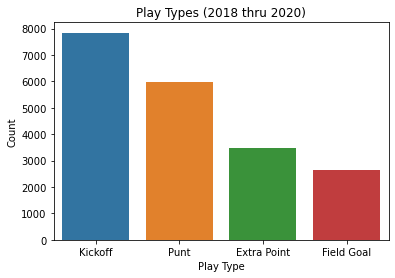

In [9]:
# determine the order based on the most to leaast since these are not ordered
order = plays.specialTeamsPlayType.value_counts().index

sb.countplot(data = plays, x = 'specialTeamsPlayType', order = order)
plt.title('Play Types (2018 thru 2020)')
plt.xlabel('Play Type')
plt.ylabel('Count');

We can see from the data that there are 4 types of Special team plays: Kickoff, Punt, Field Goal, Extra Point.  We will be more interested on just the punt data in this review so we can reduce the infomation down to just play types that are Punt.  

In [10]:
# Filter to only punt to so we can reduce the data we need to review
play_type = ['Punt']
plays_returnable = plays[plays['specialTeamsPlayType'].isin(play_type)]


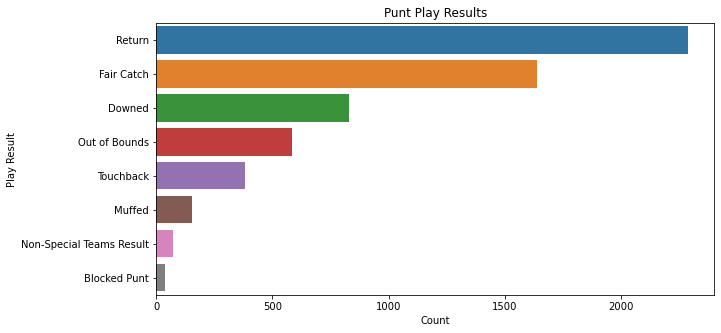

In [11]:
# Plot the type of results
plt.figure(figsize=[10,5])
order = plays_returnable.specialTeamsResult.value_counts().index

sb.countplot(data = plays_returnable, y = 'specialTeamsResult', order = order)
plt.title('Punt Play Results')
plt.ylabel('Play Result')
plt.xlabel('Count');

After reducing the data to just punting data we can take look at the what type of reuslts there are in a punt play.  Since we are intersted in successful punts, we need to look at what makes a punt returnable.  A returnable ball would allow the opposing team a chance to move the ball closer to scoring position.  A downed or Touchback would also put the ball in better position since these type of plays woudl happen in the endzone. Lets keep the data simple and look at what type of punt results in a fair catch versus a returnable.  

In [12]:
# Capture the plays that only have a result of a Fair Catch or Return
# query the data to just punt inforamtion
punt_data = plays.query('specialTeamsPlayType == "Punt"')
# filter the data down further to be just return and fair catches.
punt_data = punt_data.query('specialTeamsResult == "Return" | specialTeamsResult == "Fair Catch"')
# There are no block kicker Id or pass reuslts so we can frop those two columns
punt_data.drop(columns = ['kickBlockerId', 'passResult'], inplace=True)

punt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 1 to 19972
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  3926 non-null   int64  
 1   playId                  3926 non-null   int64  
 2   playDescription         3926 non-null   object 
 3   quarter                 3926 non-null   int64  
 4   down                    3926 non-null   int64  
 5   yardsToGo               3926 non-null   int64  
 6   possessionTeam          3926 non-null   object 
 7   specialTeamsPlayType    3926 non-null   object 
 8   specialTeamsResult      3926 non-null   object 
 9   kickerId                3926 non-null   float64
 10  returnerId              3925 non-null   object 
 11  yardlineSide            3859 non-null   object 
 12  yardlineNumber          3926 non-null   int64  
 13  gameClock               3926 non-null   object 
 14  penaltyCodes            502 non-null   

In [13]:
# filter if kick return is 
punt_data[punt_data['kickReturnYardage'].isnull()].specialTeamsResult.value_counts()

Fair Catch    1640
Return           8
Name: specialTeamsResult, dtype: int64

In [14]:
pd.set_option('display.max_colwidth', None)
punt_data[punt_data['kickReturnYardage'].isnull()][punt_data['specialTeamsResult'] == 'Return']['playDescription']


C:\Users\DKREJC~1\AppData\Local\Temp/ipykernel_21140/261768806.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  punt_data[punt_data['kickReturnYardage'].isnull()][punt_data['specialTeamsResult'] == 'Return']['playDescription']


533                                                                                                                       (14:22) (Punt formation) J.Berry punts 39 yards to KC 42, Center-K.Canaday. D.Thomas to PIT 27 for 31 yards (C.Sutton). FUMBLES (C.Sutton), and recovers at PIT 22. D.Thomas to PIT 10 for 12 yards (T.Edmunds).
3850                                                                                                            (4:25) (Punt formation) R.Allen punts 49 yards to TEN 36, Center-J.Cardona. A.Jackson to TEN 49 for 13 yards (J.Develin, N.Ebner). FUMBLES (J.Develin), and recovers at NE 49. A.Jackson to NE 49 for no gain (J.Develin).
4468     (13:33) L.Cooke punts 55 yards to BUF 30, Center-M.Overton. I.McKenzie to BUF 39 for 9 yards (J.Wilson). FUMBLES (J.Wilson), and recovers at BUF 43. I.McKenzie to BUF 43 for no gain (N.DeLuca). Return credited to BUF 36 (spot of foul). PENALTY on BUF-M.Murphy, Illegal Block Above the Waist, 10 yards, enforced at BUF 36.
4597   

In [15]:
# Add zero for all the Fair Catch to be zero
punt_data.kickReturnYardage.fillna(0, inplace=True)

In [16]:
updates = [[114, 31],
           [759, 13],
           [889, 9],
           [911, -3],
           [996, 8],
           [2789, 0],
           [3191, 2],
           [3833, 6]]

for update in updates:
    punt_data.iloc[update[0], 20] = update[1]
    

In [17]:
# Confirm there are no null values left
punt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 1 to 19972
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   gameId                  3926 non-null   int64  
 1   playId                  3926 non-null   int64  
 2   playDescription         3926 non-null   object 
 3   quarter                 3926 non-null   int64  
 4   down                    3926 non-null   int64  
 5   yardsToGo               3926 non-null   int64  
 6   possessionTeam          3926 non-null   object 
 7   specialTeamsPlayType    3926 non-null   object 
 8   specialTeamsResult      3926 non-null   object 
 9   kickerId                3926 non-null   float64
 10  returnerId              3925 non-null   object 
 11  yardlineSide            3859 non-null   object 
 12  yardlineNumber          3926 non-null   int64  
 13  gameClock               3926 non-null   object 
 14  penaltyCodes            502 non-null   

Looking at the dat with can see that kickReturnYardage has quite a few null values.  There is 1640 fair catchs that have a null value which can be entered as zero yards return. A fair catch would actually result in a zero return I replaced these null values with a 0.  This woudl leave a total of 8 returnable plays that have a null values.  After reviewing the description we see that these 8 had a fumble occur which resulted in a non return.  However,  if we look at the description we can see that there was a retrun prior to fumble happening.  I used these return yards in place of the null values.  We coudl assume that if there was not fumble the most likely would have been a tackle and end to the play at about that return yards.

There was also a few hang times that are a null value.  I dropped these as the description doens't actually state anything in regards to the hang time, and there was no way to accuratly determine this value.  It made the most sense to drop these 2 rows.  

In [18]:
# Add in the game data to get season
punt_data = punt_data.merge(games, on = 'gameId', how='left')
punt_data.sample(1)

,gameId,playId,playDescription,quarter,down,yardsToGo,possessionTeam,specialTeamsPlayType,specialTeamsResult,kickerId,...,kickLength,kickReturnYardage,playResult,absoluteYardlineNumber,season,week,gameDate,gameTimeEastern,homeTeamAbbr,visitorTeamAbbr
3669,2020121312,4733,"(:08) T.Way punts 46 yards to SF 25, Center-N.Sundberg, fair catch by R.James.",4,4,25,WAS,Punt,Fair Catch,40600.0,...,46.0,0.0,46,39,2020,14,12/13/2020,16:25:00,SF,WAS


In [19]:
# add in pff data to the Punt data
pff_sub = pff.loc[:,['gameId', 'playId', 'hangTime', 'kickDirectionIntended', 'kickDirectionActual', 'returnDirectionIntended', 'returnDirectionActual', 'kickType']]

# merge into punt_data
punt_data = pd.merge(punt_data, pff_sub, on=['gameId', 'playId'])

punt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3926 entries, 0 to 3925
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   3926 non-null   int64  
 1   playId                   3926 non-null   int64  
 2   playDescription          3926 non-null   object 
 3   quarter                  3926 non-null   int64  
 4   down                     3926 non-null   int64  
 5   yardsToGo                3926 non-null   int64  
 6   possessionTeam           3926 non-null   object 
 7   specialTeamsPlayType     3926 non-null   object 
 8   specialTeamsResult       3926 non-null   object 
 9   kickerId                 3926 non-null   float64
 10  returnerId               3925 non-null   object 
 11  yardlineSide             3859 non-null   object 
 12  yardlineNumber           3926 non-null   int64  
 13  gameClock                3926 non-null   object 
 14  penaltyCodes            

In [20]:
# Drop the two null values of hang Time
punt_data = punt_data.dropna(subset=['hangTime'])
punt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3924 entries, 0 to 3925
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   3924 non-null   int64  
 1   playId                   3924 non-null   int64  
 2   playDescription          3924 non-null   object 
 3   quarter                  3924 non-null   int64  
 4   down                     3924 non-null   int64  
 5   yardsToGo                3924 non-null   int64  
 6   possessionTeam           3924 non-null   object 
 7   specialTeamsPlayType     3924 non-null   object 
 8   specialTeamsResult       3924 non-null   object 
 9   kickerId                 3924 non-null   float64
 10  returnerId               3923 non-null   object 
 11  yardlineSide             3857 non-null   object 
 12  yardlineNumber           3924 non-null   int64  
 13  gameClock                3924 non-null   object 
 14  penaltyCodes            

We will also want to see the diferecnce over teh seasons so lets add the season and week information to the punt data.  

In [21]:
punt_data.drop(labels=['yardlineSide', 'yardlineNumber', 'gameClock', 'penaltyCodes', 'penaltyJerseyNumbers', 'penaltyYards'], axis=1, inplace=True)
punt_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3924 entries, 0 to 3925
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   gameId                   3924 non-null   int64  
 1   playId                   3924 non-null   int64  
 2   playDescription          3924 non-null   object 
 3   quarter                  3924 non-null   int64  
 4   down                     3924 non-null   int64  
 5   yardsToGo                3924 non-null   int64  
 6   possessionTeam           3924 non-null   object 
 7   specialTeamsPlayType     3924 non-null   object 
 8   specialTeamsResult       3924 non-null   object 
 9   kickerId                 3924 non-null   float64
 10  returnerId               3923 non-null   object 
 11  preSnapHomeScore         3924 non-null   int64  
 12  preSnapVisitorScore      3924 non-null   int64  
 13  kickLength               3924 non-null   float64
 14  kickReturnYardage       

The most used is Normal kick type, followed byt Aussie_Style Kick type.  There are a few that use Rugby style but the numer is 

## Univariate Exploration


### Punt Results

The intial review of the the play type results of kickpff and returns shows that the majority of the Results appears to be a return followed by a touchback.  This would be an interesting to see of this has changed over the course of the seasons.  And also what the diffence is between kick off and punts

When can see that using the two returnable type of kicks, kickoffs and punts, we can see that most lickely result will be a touch back followed by a return.  While a punt the most likely response will be a return followed by a fair catch.  We can also see by this data that it looks like the this breakdown is consistant over the course of the last three season.  We can also see that the number of Returns, and Fair Catches appear to reduce over time, 

### Punt Length

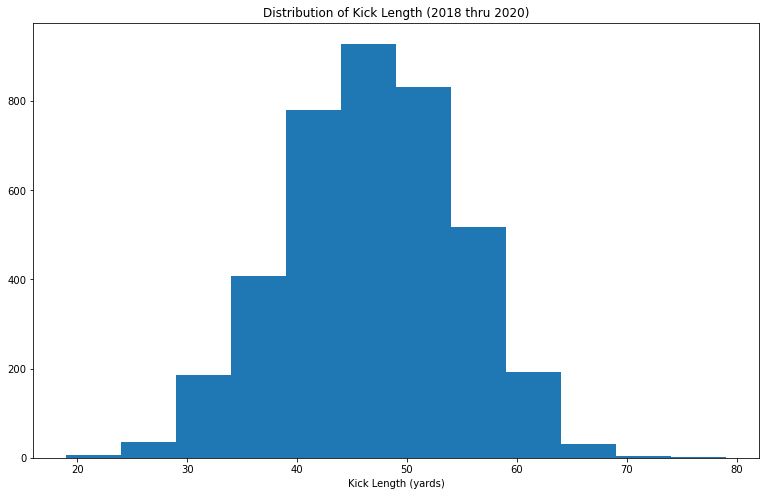

In [22]:
bins = np.arange(punt_data.kickLength.min(), punt_data.kickLength.max() + 5, 5)

plt.figure(figsize=[13,8])
plt.hist(data = punt_data, x = 'kickLength', bins = bins)
plt.title('Distribution of Kick Length (2018 thru 2020)')
plt.xlabel('Kick Length (yards)');


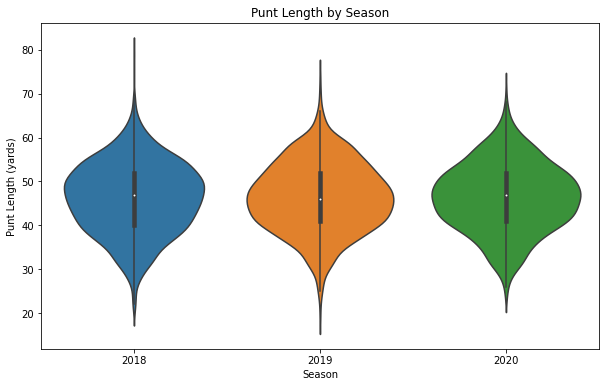

In [23]:
# g = sb.FacetGrid(data = plays_returnable, col = 'specialTeamsPlayType', row = 'season', aspect=1.5)
# g.map(sb.violinplot, 'kickLength', order= ['2018', '2019', '2020']);
plt.figure(figsize=[10,6])

sb.violinplot(data = punt_data, x = 'season', y = 'kickLength')
plt.title('Punt Length by Season')
plt.xlabel('Season')
plt.ylabel('Punt Length (yards)');

Fist we can see that as a whole there a normal distribtion of the kick length with median being between 45 and 50 yards. Taking the review one step further and plotting the punt length over teh course of the seasons from 2018 to 2020, we see that there was consitancey over the course of the season.  THe meadian of all three season was just under 50 yards.  The distribution also seems similar when we look at this.  

### Punt Return Yards

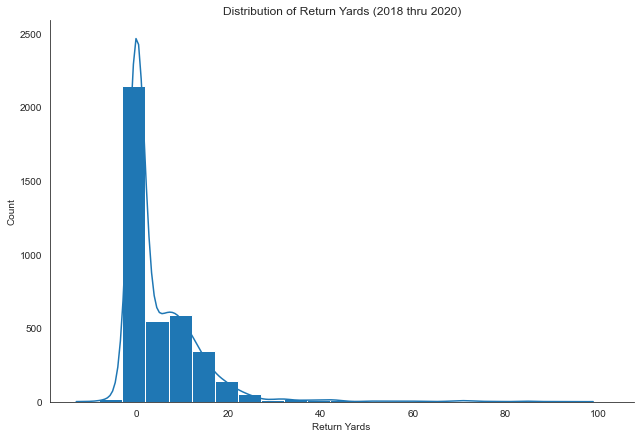

In [24]:
# set the bin width to 5 yard spacing
bins = np.arange(punt_data.kickReturnYardage.min(), punt_data.kickReturnYardage.max() + 5, 5)
sb.set_style("white")
# Increase the size of the plot for better visual
sb.displot(data = punt_data, x = 'kickReturnYardage', bins = bins, kde=True, height=6, aspect=1.5, color=BASE_COLOR)
plt.hist(data = punt_data, x = 'kickReturnYardage', bins = bins)
plt.title('Distribution of Return Yards (2018 thru 2020)')
plt.xlabel('Return Yards')
plt.ylabel('Count');

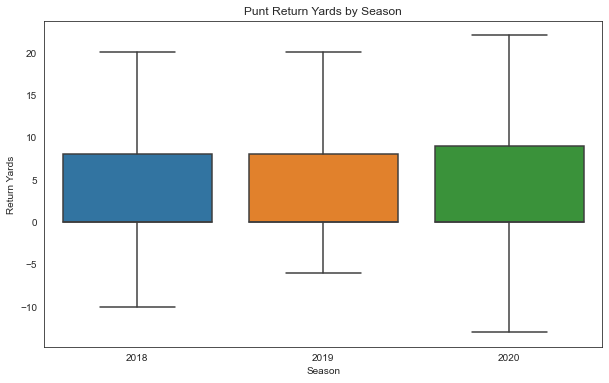

In [25]:
# Make the plot slightly bigger to match the other plot sizes
plt.figure(figsize=[10,6])

sb.boxplot(data = punt_data, x = 'season', y = 'kickReturnYardage', showfliers = False)
plt.title('Punt Return Yards by Season')
plt.xlabel('Season')
plt.ylabel('Return Yards');

At first plotting the return yards we see that this is highly skewed to the right, with the majority of the returns falling between 0 and 5 yards.  Reviewing the Return yards over the course of the last three seasons there appears to be a consistancy through each season.  Although 2020 does display a slightly larger spread from 0 yard return to just under 10 yards the other season are with a yard or two of the spread.  

In [26]:
# Determine the yards per return average by season
def get_return_data(s, df):
    if s == 'All':
         # Get the data for number of return counts
        punt_return_counts = df.query('specialTeamsPlayType == "Punt"'.format(s)).returnerId.value_counts()
        kickoff_return_counts = df.query('specialTeamsPlayType == "Kickoff"'.format(s)).returnerId.value_counts()
        # get the the series for the total yards
        punt_return_yards = df.query('specialTeamsPlayType == "Punt"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']
        kickoff_return_yards = df.query('specialTeamsPlayType == "Kickoff"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']

        # Create a dictionary for concatations
        data = {'punt_return_yards': punt_return_yards,
                'punt_return_counts': punt_return_counts,
                'kickoff_return_yards': kickoff_return_yards,
                'kickoff_return_counts': kickoff_return_counts}

        # Concat the two series into new datafra,e
        df_returner = pd.concat(data, axis=1) 

        # determine the yards per return
        df_returner['punt_yard_per_return'] = df_returner['punt_return_yards'] / df_returner['punt_return_counts']
        df_returner['kickoff_yard_per_return'] = df_returner['kickoff_return_yards'] /df_returner['kickoff_return_counts']

        return df_returner
    else:
        # Get the data for number of return counts
        punt_return_counts = df.query('season == {} & specialTeamsPlayType == "Punt"'.format(s)).returnerId.value_counts()
        kickoff_return_counts = df.query('season == {} & specialTeamsPlayType == "Kickoff"'.format(s)).returnerId.value_counts()
        # get the the series for the total yards
        punt_return_yards = df.query('season ==  {} & specialTeamsPlayType == "Punt"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']
        kickoff_return_yards = df.query('season == {} & specialTeamsPlayType == "Kickoff"'.format(s)).groupby('returnerId').sum()['kickReturnYardage']

        # Create a dictionary for concatations
        data = {'punt_return_yards': punt_return_yards,
                'punt_return_counts': punt_return_counts,
                'kickoff_return_yards': kickoff_return_yards,
                'kickoff_return_counts': kickoff_return_counts}

        # Concat the two series into new datafra,e
        df_returner = pd.concat(data, axis=1) 

        # determine the yards per return
        df_returner['punt_yard_per_return'] = df_returner['punt_return_yards'] / df_returner['punt_return_counts']
        df_returner['kickoff_yard_per_return'] = df_returner['kickoff_return_yards'] /df_returner['kickoff_return_counts']

        return df_returner

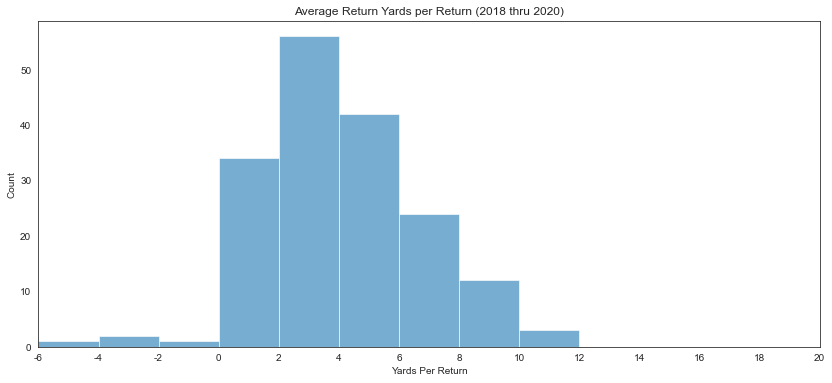

In [27]:
seasons = punt_data.season.value_counts().index
min_x = -6
max_x = 20
step = 2
x_layout = np.arange(min_x, max_x + step, step)

plt.figure(figsize=[14,6])

returner_data = get_return_data('All', punt_data)
 
bins = x_layout
plt.hist(returner_data['punt_yard_per_return'], alpha = .6, label='Punt', bins = bins)
plt.title('Average Return Yards per Return (2018 thru 2020)')
plt.xticks(x_layout, x_layout) 
plt.xlim(min_x, max_x)
plt.xlabel('Yards Per Return')
plt.ylabel('Count');

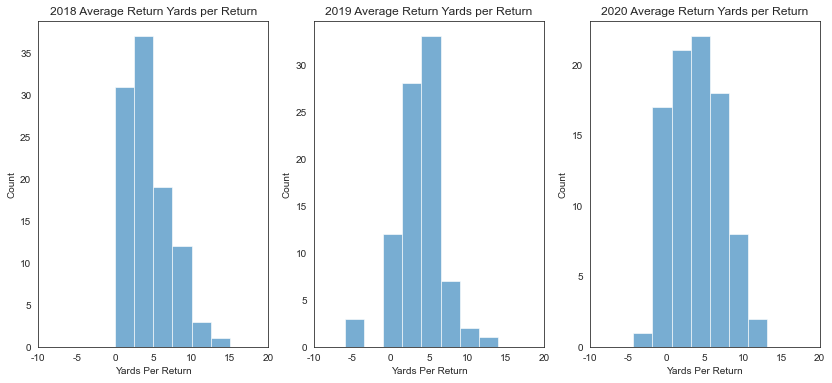

In [28]:

seasons = punt_data.season.value_counts().index
plot_no = 1

plt.figure(figsize=[14,6])

for season in seasons:
    plt.subplot(1, 3, plot_no)
    plot_no += 1
    returner_data = get_return_data(season, punt_data)    
    bins = np.arange(returner_data['punt_yard_per_return'].min(), returner_data['punt_yard_per_return'].max() + 2.5, 2.5)
    plt.hist(returner_data['punt_yard_per_return'], alpha = .6, label='Punt', bins=bins)
    plt.title('{} Average Return Yards per Return'.format(season))
    plt.xticks(np.arange(-10, 20 + 5, 5), np.arange(-10, 20 + 5, 5)) 
    plt.xlim(-10, 20)
    plt.xlabel('Yards Per Return')
    plt.ylabel('Count');

Another way to look at the return yards is to determine the average return yards per returner.  So I reworked the number to figure out the total return yards and the total number of returns by a player.  Divdiing these numbers we can get the average yards per return.  

I first looked at the average yards per return as a whole and looking at that distribution of the yard per return avergae it appears that this is slightly skwed to the right with most returners averaging around 2.5 yards per return.  

In 2018 there are two seperate peaks one at 0 yards and the at around 5 yards.  Which is interesting display considering that the other years it shows a more normal distribution.    These two peaks could be that when a player choose to return a ball in 2018 they had a much higher chance or were more successful in getting 5 yards every carry.  While the other two seasons it would appear that this is not the case

The two peaks in the punting for 2018, might also be that the top two results was Return or a Fair Catch.  And these were more then other seasons.  The Fair catch would push the average down around zero and then a return it would appear that the average is 5 yards.  There is some room in this area to further dive into the this data and see of what factors of a kick contribute to a a fair catch versus a good retrun. It would appear that for years 2019 and 2020 the punt does not have a two distinct peaks but actually follows a more normal distribution.  But this isn't the same case as with  

### Punt Hang Time Review

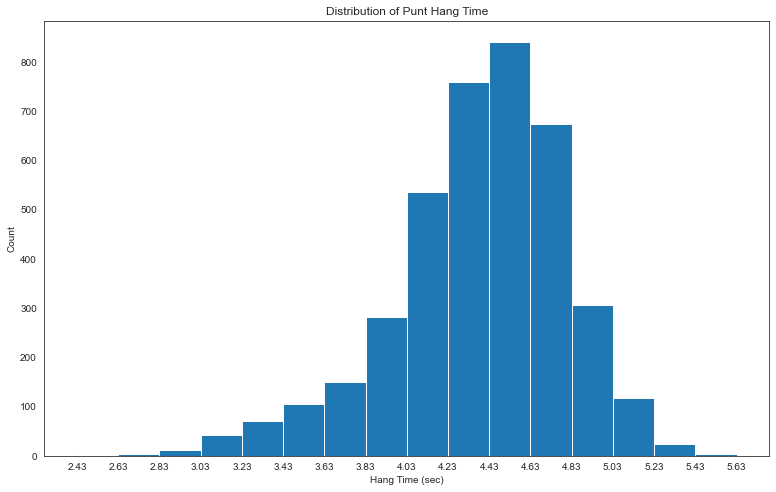

In [29]:
plt.figure(figsize=[13,8])
bins = np.arange(punt_data.hangTime.min(), punt_data.hangTime.max() + .2, .2)

plt.hist(punt_data.hangTime, bins=bins) 
plt.title('Distribution of Punt Hang Time')
plt.xticks(bins)
plt.xlabel('Hang Time (sec)')
plt.ylabel('Count');

Looking at the hang time is normally distrubuted 4.22 sec. The median hang time is between 4.02 and 4.22 sec.  The times appear to be distructuted nramlly with a slight skew to the left this seen by the long tail on the left but this is only a slight skew of the data.  This isn't that much of surprise of a distribution of punt Hang time.  

#### Punt Style Review

There are a total of 3 types of kicks used Normal, Aussie-Style, Rugby Style.  Lets see what the use of these three types are.  

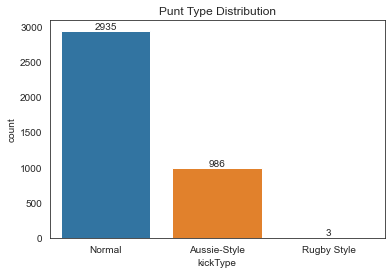

In [30]:
# Plot the bar plot for the kick type
kick_styles = {'N': 'Normal',
               'A': 'Aussie-Style',
               'R': 'Rugby Style'}
# determine new tick values 
n_kicks = punt_data['kickType'].value_counts().sum()
x_counts = punt_data.kickType.value_counts()
x_values = list(x_counts.index)
x_labels = []
for x in x_values:
    x_labels.append('{}'.format(kick_styles[x]))

# Plot the count of styles
chart = sb.countplot(data=punt_data, x='kickType', order=x_values)
chart.bar_label(chart.containers[0])

plt.title('Punt Type Distribution')

plt.xticks(range(0, len(x_values)), x_labels);

We can see that majority of punt types would be considered as normal, followed by Aussie-Style, there are a few Rugby Style punts but those extremely rare in the 2018 thru 2020 seasons.  

## Bivariate Exploration


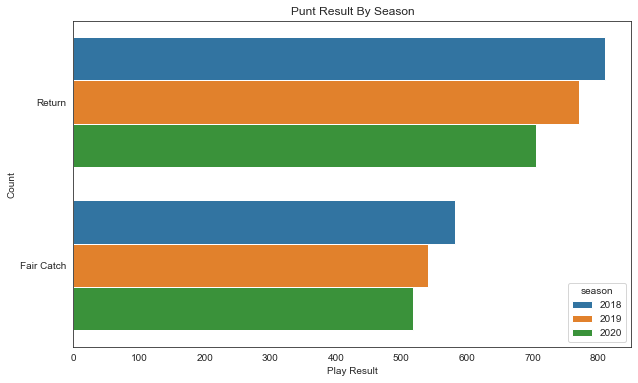

In [31]:
# Display the play results based on the season (Row) and also on the type (col)
order = punt_data.specialTeamsResult.value_counts().index
# increase the size of plot
plt.figure(figsize=[10,6])

# A box plot becacuse specialteam results is a category
sb.countplot(data = punt_data, y ='specialTeamsResult', hue='season', order = order)
plt.title('Punt Result By Season')
plt.xlabel('Play Result')
plt.ylabel('Count');

We limited the punt results and we see that if we plot these two values over the course of the season we can see that they actually go down form season to season.  It is intersting to note that both Return and Fair Catches both go down.  This could be that punts in general went down between season.  It is also possible that if the number of punts remained the same but a other results increased.  

### Kick Length Versus Return Yards

Let us see the if the kick lenth has any correlation with the return length.  Since these are both qualitative continous using a scatterplot would be the most appriate.

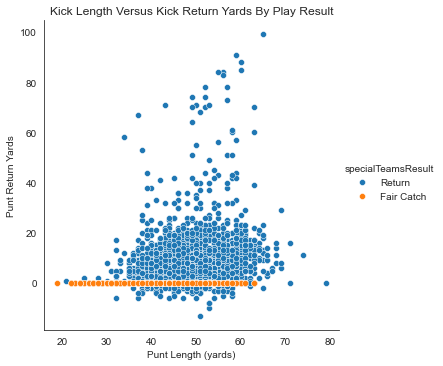

In [32]:

g = sb.FacetGrid(punt_data, hue = 'specialTeamsResult', height=5, aspect=1)
g.map(sb.scatterplot, 'kickLength', 'kickReturnYardage')
g.add_legend()
plt.title('Kick Length Versus Kick Return Yards By Play Result')
plt.xlabel('Punt Length (yards)')
plt.ylabel('Punt Return Yards');


There doesn't seem to be any strong coorelation between the length of a punt as a whole.  The data plotted for all three season results in a over plot scatter and really takes away from being able to see any cluster patter.  Lets look at this data from a season to season to see if that reduction of data pionts can help see of there is an clustering patterns.  

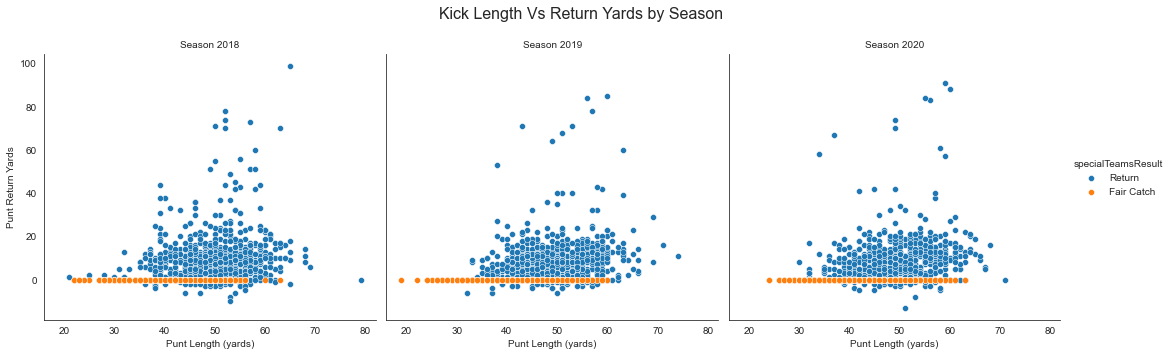

In [33]:

g = sb.FacetGrid(punt_data, col = 'season', hue = 'specialTeamsResult', height=5, aspect = 1)
g.map(sb.scatterplot, 'kickLength', 'kickReturnYardage')
g.fig.subplots_adjust(top  = 0.85)
g.fig.suptitle('Kick Length Vs Return Yards by Season', fontsize=16)
g.set_titles('Season {col_name}')
g.set_axis_labels('Punt Length (yards)', 'Punt Return Yards') 
g.add_legend();


Even with a reduction of data there doesn't appear to be any significant correlation between the kick length and kick return.  It does look like that if there is a kick that is less than 35 yards there are few if any returns.  While any of punt that is less than 35 yards appears to be mostly ends in a fair catch.  But since there is no actual correlation between that and the return we will need to turn towards the hang time and see if there is a better correlation between that and the return length.  As we can see there really isn't any significant differeces between the season, moving forward it doens't make sense to split and instead look at this data as a whole.  

### Hang Time Versus Play Rsult

Because it looks like the kick length doens't have a strong correlation beteen the whether the play will result in a Fair catch or with a return.

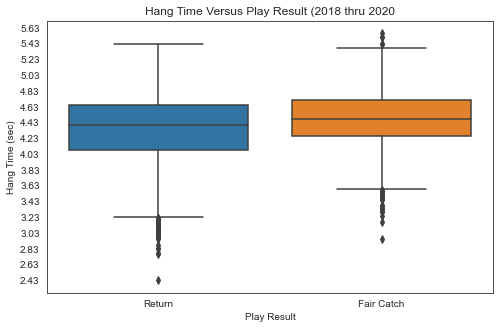

In [34]:
# Plot the hangtime versus the count of 
# make the hangtime down to the a 1/4 sec
x_label = np.arange(punt_data['hangTime'].min(), punt_data['hangTime'].max()+.2, .2)

plt.figure(figsize=[8, 5])

sb.boxplot(data = punt_data, x = 'specialTeamsResult', y='hangTime')
plt.yticks(x_label)
plt.title('Hang Time Versus Play Result (2018 thru 2020')
plt.ylabel('Hang Time (sec)')
plt.xlabel('Play Result');
   

There is a slight difference in the play result versus hang time.  It would appeat that if the hang time is above 4.43 seconds that the chances of return are diminshed, with most returns are under 4.63 seconds.  The return also appears to be slightly skewed to the left.  This would make sinse since the hang time   

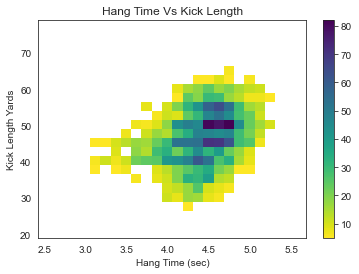

In [35]:
# plot to see if there is a corelation between hang time and kick length
x_bins = np.arange(punt_data.hangTime.min(), punt_data['hangTime'].max() + 0.125, 0.125)
y_bins = np.arange(punt_data.kickLength.min(), punt_data.kickLength.max() + 2.5, 2.5)


plt.hist2d(data = punt_data, x = 'hangTime', y='kickLength', cmin=5, cmap='viridis_r', bins=[x_bins, y_bins])
plt.colorbar()
plt.title('Hang Time Vs Kick Length')
plt.xlabel('Hang Time (sec)')
plt.ylabel('Kick Length Yards');


As seen earlier data points of this data set is pretty large, and results in overcrowding, a heatmap would make a better choice to see any patterns.  We can see that the majority of kicks had a hang time around the 4.5 sec, resulting in a kick length of 50 yards or so.  There isn't a clear correlation between hang time and kick length which I would think you see.  But since most of these kicks are clustered around a certain point it can really reduct the coorelation view.   We should take a look and see if there is a pattern with the hang time and kick length have an affect on the whether the punt will result in a fair catch or a return.  

### Kick Types

Lets take a look at which type of kick produces the best hang time and the best the kick length

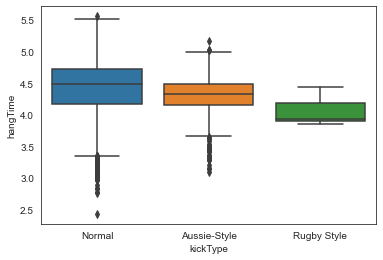

In [36]:
# Plot the bar plot for the kick type
kick_styles = {'N': 'Normal',
               'A': 'Aussie-Style',
               'R': 'Rugby Style'}
# determine new tick values 
x_order = list(x_counts.index)
x_labels = []
for x in x_order:
    x_labels.append('{}'.format(kick_styles[x]))
    
sb.boxplot(data = punt_data, x = 'kickType', y = 'hangTime', order=x_order)
plt.xticks(range(0, len(x_order)), x_labels);

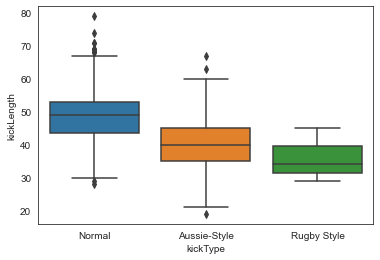

In [37]:
sb.boxplot(data=punt_data, x = 'kickType', y = 'kickLength', order = x_order)
plt.xticks(range(0, len(x_order)), x_labels);

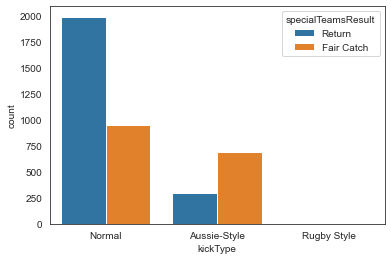

In [38]:
sb.countplot(data=punt_data, x = 'kickType', hue = 'specialTeamsResult')
plt.xticks(range(0, len(x_order)), x_labels);

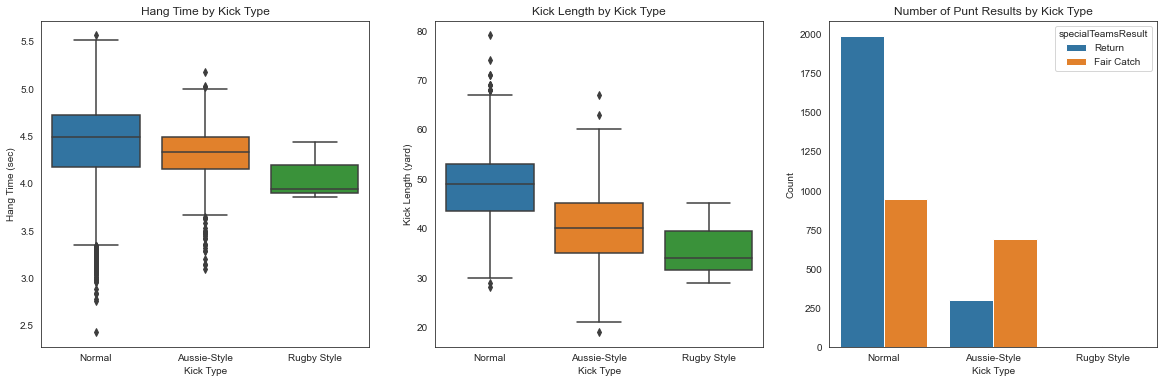

In [39]:
plt.figure(figsize=[20,6])

plt.subplot(1, 3, 1)
# Plot the bar plot for the kick type
kick_styles = {'N': 'Normal',
               'A': 'Aussie-Style',
               'R': 'Rugby Style'}
# determine new tick values 
x_order = list(x_counts.index)
x_labels = []
for x in x_order:
    x_labels.append('{}'.format(kick_styles[x]))
    
sb.boxplot(data = punt_data, x = 'kickType', y = 'hangTime', order=x_order)
plt.title('Hang Time by Kick Type')
plt.xlabel('Kick Type')
plt.ylabel('Hang Time (sec)')
plt.xticks(range(0, len(x_order)), x_labels);

plt.subplot(1, 3, 2)
sb.boxplot(data=punt_data, x = 'kickType', y = 'kickLength', order = x_order)
plt.title('Kick Length by Kick Type')
plt.xlabel('Kick Type')
plt.ylabel('Kick Length (yard)')
plt.xticks(range(0, len(x_order)), x_labels);

plt.subplot(1, 3, 3)
sb.countplot(data=punt_data, x = 'kickType', hue = 'specialTeamsResult')
plt.title('Number of Punt Results by Kick Type')
plt.xlabel('Kick Type')
plt.ylabel('Count')
plt.xticks(range(0, len(x_order)), x_labels);

From these three graphs we can see that Normal punt type has the highest Hang Time and also the longest kick.  The hang time for the Aussie stye is only slightly less then the hang time of Normal.  Although the graph doesn show a difference in the hang time we can see that the difference is with a 0.5 seconds of each other.  In reality that 1/2 second wouldn't really be noticed by anyone palying or watching.   However, we can see that the Aussie style with a kick length of about 40 yards doesn't get the same kick length as a normal kick wich as a median value of just under 50 yards.  The Rugby style is by far the worse form of kicking with the Hang time being almost 1/2 sec less then Normal Style and even worse the average is about 15 yards shorter. I would recommend staying away from that style.  

One important note is that the Aussie Style Type actaully results in more Fair Catches, while a normal kick results in significantly more Returns.  This is interesting because when we looked at the kick length and hang time they didn't really show a significant difference.  To really see what is going on we will need to see what affect the kick length and hang time together affect the play result.

### Hang Time, Kick Length, Play Result Review

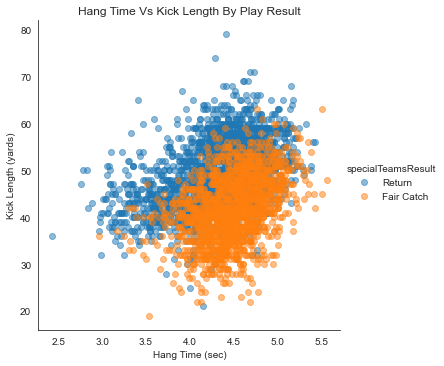

In [40]:
g = sb.FacetGrid(data = punt_data, hue = 'specialTeamsResult', height=5, aspect = 1)
g.map(plt.scatter, 'hangTime', 'kickLength', alpha = 0.5)
g.add_legend()
plt.title('Hang Time Vs Kick Length By Play Result')
plt.xlabel('Hang Time (sec)')
plt.ylabel('Kick Length (yards)');

We can see that there does seem to be a two clusters based on the hang time and kick length.  It is hard to really see what is happending so lets switch from a scatter plot to a heat map to see where the center of the two clusters are.  Lets change this to a heat map.

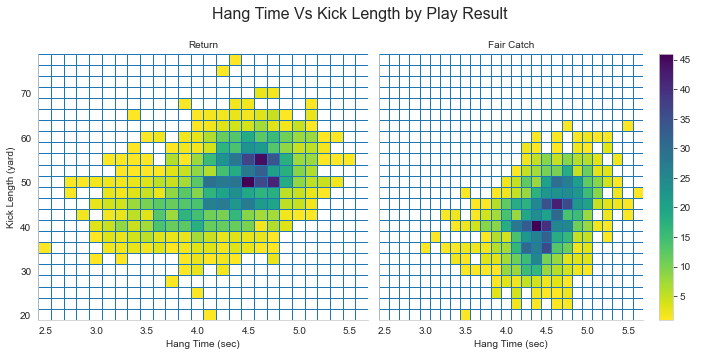

In [59]:
# plot the hang time versus kick length split among Return and Fair Catch.  With the amoutn of data two seperate heat maps would make more since
g = sb.FacetGrid(data = punt_data, col = 'specialTeamsResult', height=5, aspect = 1,)

g.map(plt.hist2d, 'hangTime', 'kickLength', cmin=.5, cmap='viridis_r', bins = [x_bins, y_bins])
g.fig.subplots_adjust(top  = 0.85)
g.fig.suptitle('Hang Time Vs Kick Length by Play Result', fontsize=16)
g.set_titles("{col_name}") # use this argument literally
g.set_axis_labels('Hang Time (sec)', 'Kick Length (yard)')
g.add_legend()
plt.grid(which='major', axis='both', visible=False)
plt.colorbar();



In [42]:
total = punt_data.shape[0]
count = punt_data[punt_data['kickReturnYardage'] < 10].playId.count()

print(count / total)

0.7861875637104995


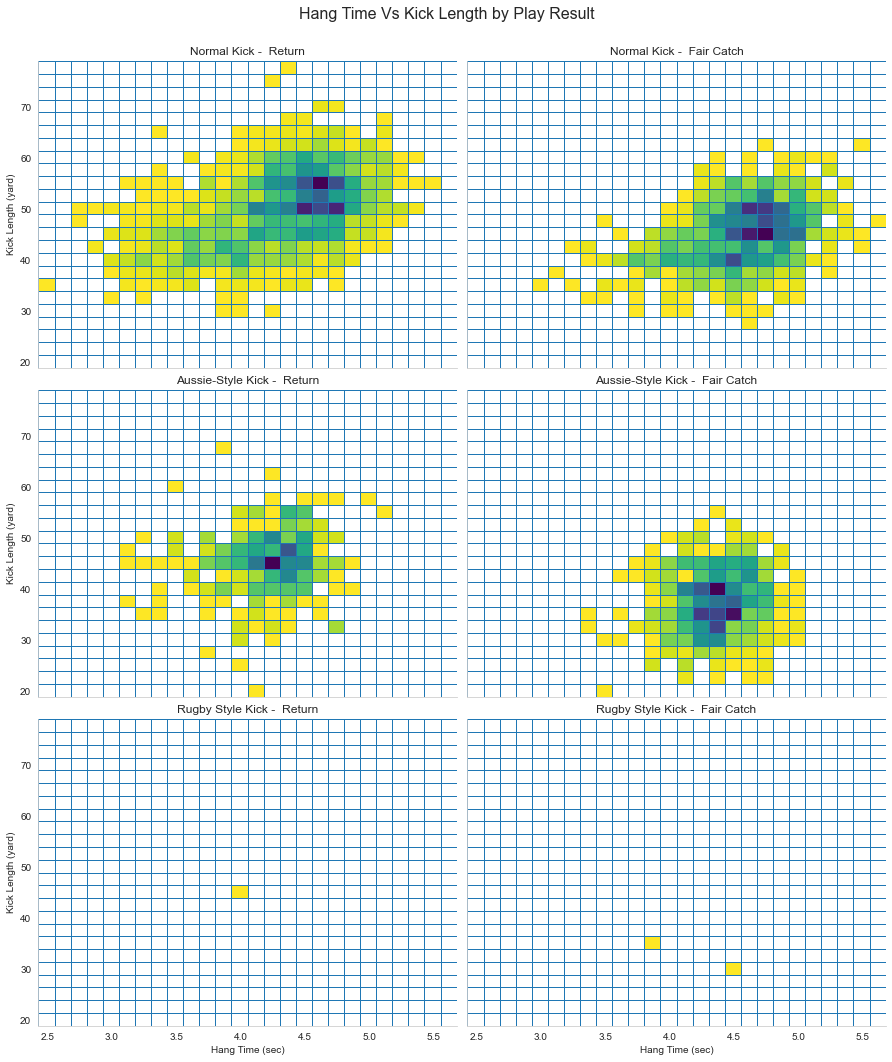

In [43]:
x_bins = np.arange(punt_data.hangTime.min(), punt_data['hangTime'].max() + 0.125, 0.125)
y_bins = np.arange(punt_data.kickLength.min(), punt_data.kickLength.max() + 2.5, 2.5)

kick_styles = {'N': 'Normal',
               'A': 'Aussie-Style',
               'R': 'Rugby Style'}
g = sb.FacetGrid(data = punt_data, row = 'kickType', col = 'specialTeamsResult', height =5, aspect = 1.25)
g.map(plt.hist2d, 'hangTime', 'kickLength', cmin=.5, cmap='viridis_r', bins = [x_bins, y_bins])
g.fig.subplots_adjust(top  = .93)
g.fig.suptitle('Hang Time Vs Kick Length by Play Result', fontsize=16)

# for (row_val, col_val), ax in g.axes_dict.items():
#     g.set_titles(col_template = "{}".format(col_val), row_template = "{}".format(kick_styles[row_val]))

for (row_key, col_key),ax in g.axes_dict.items():
    ax.set_title(f"{kick_styles[row_key]} Kick -  {col_key}")

g.set_axis_labels('Hang Time (sec)', 'Kick Length (yard)');
    

Splitting the data into the results of Return or Fair catch we can see that although the Hang time of the kicks for both Return and Fair Catches was about 4.5 sec the Fair catch could might be slightly.  The kick length shows a different story.  Although the hang time is similar we can see that the kick length changes, with a hang time of arounf 4.5 second and a about 50 yard to 55 yard, has a higher chance to be returned.  While a kick length of 40 to 45 yards has a higher chance of being downed as a fair catch.  If the goal would be to not have a return then the recommendation would be for punter to shoot for a high short kick.  This makes sense because this gives the gunners the best oppurtunity to get into position to force a Fair Catch call.  

One concern would be you are giving the opposing team about 10 yards by kicking it short.  Is this going to give the opposing team better field position.  As we showed earlier that the average return is usually between 2.5 and 7.5 yards and 78% of all returns are under 10 yards which would be less than or equal to having the punter kick the punt short.   At this point the recommendation would be for the punter to have a hang time og apprx 4.5 sec and get the ball within the 50 - 55 yard range.  This sets the team up with the highest chance of success.  Which would be difined as the opposing team have field position furthest from the endzone.  

## Conclusions


From these three graphs we can see that Normal punt type has the highest Hang Time and also the longest kick. The hang time for the Aussie stye is only slightly less then the hang time of Normal. Although the graph doesn show a big difference in the hang time we can see that the difference is with a 0.5 seconds of each other. In reality that 1/2 second wouldn't really be noticed by anyone palying or watching. However, we can see that the Aussie style with a kick length of about 40 yards doesn't get the same kick length as a normal kick wich as a median value of just under 50 yards. The Rugby style is by far the worse form of kicking with the Hang time being almost 1/2 sec less then Normal Style and even worse the average is about 15 yards shorter. I would recommend staying away from that style.

One important note is that the Aussie Style Type actaully results in more Fair Catches, while a normal kick results in significantly more Returns. This is interesting because when we looked at the kick length and hang time they didn't really show a significant difference. To really see what is going on we will need to see what affect the kick length and hang time together affect the play result.

BY splitting the data into the results of Return or Fair catch we can see that although the Hang time of the kicks for both Return and Fair Catches was about 4.5 sec the Fair catch. The kick length shows a different story. Although the hang time is similar we can see that the kick length changes, with a hang times of around 4.5 second the normal style kick has a kick length of about 50 yard to 55 yard, has a higher chance to be returned. While a hang time of 4.5 sec and a kick length of 40 to 45 yards the Aussie-Style has a higher chance of being a fair catch. If the goal would be to not have a return then the recommendation would be for punter to shoot for a high short kick. This makes sense because this gives the gunners the best oppurtunity to get into position to force a Fair Catch call.

One concern would be you are giving the opposing team about 10 yards by kicking it short. Is this going to give the opposing team better field position. As we showed earlier that the average yards per return is usually between 2.5 and 7.5 yards and that 78% of all returns are under 10 yards which would be less than or equal to having the punter kick the punt short to result in a fair catch.  This would result in the opposing team being further away from scoring position.  Which is the goal of a punt.   At this point the recommendation would be for the punter to have a hang time of apprx 4.5 sec and get the ball within the 50 - 55 yard range. To get this it is also recommended that they use a Normal style punt. This sets the team up with the highest chance of success. Which would be difined as the opposing team have field position furthest from the endzone.

In [44]:
punt_data.to_csv(os.path.join('data', 'punt_data.csv'))